## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    x = input_layer
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
        x = keras.layers.Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.2, 0.25, 0.3]
OPTIMIZER = [('SGD', keras.optimizers.SGD), ('Adam', keras.optimizers.Adam)]

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for name, OPT in OPTIMIZER:
    for drp in Dropout_EXP:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with opt = %s, drop ratio = %.2f" % (name, drp))
        model = build_mlp(input_shape=x_train.shape[1:], drp_ratio=drp)
        model.summary()
        optimizer = OPT(lr=LEARNING_RATE)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]

        exp_name_tag = "exp-%s-drp%s" % (name, str(drp))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with opt = SGD, drop ratio = 0.20
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________________________________________

50000/50000 [==============================] - 3s 68us/step - loss: 1.8642 - acc: 0.3308 - val_loss: 1.7924 - val_acc: 0.3708
Epoch 44/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8577 - acc: 0.3341 - val_loss: 1.7881 - val_acc: 0.3714
Epoch 45/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8567 - acc: 0.3306 - val_loss: 1.7841 - val_acc: 0.3756
Epoch 46/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8504 - acc: 0.3362 - val_loss: 1.7793 - val_acc: 0.3769
Epoch 47/50
50000/50000 [==============================] - 3s 68us/step - loss: 1.8489 - acc: 0.3358 - val_loss: 1.7760 - val_acc: 0.3759
Epoch 48/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8428 - acc: 0.3396 - val_loss: 1.7721 - val_acc: 0.3774
Epoch 49/50
50000/50000 [==============================] - 3s 69us/step - loss: 1.8412 - acc: 0.3367 - val_loss: 1.7684 - val_acc: 0.3798
Epoch 50/50
50000/50000 [=====================

Epoch 42/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8816 - acc: 0.3208 - val_loss: 1.7984 - val_acc: 0.3703
Epoch 43/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8805 - acc: 0.3229 - val_loss: 1.7958 - val_acc: 0.3715
Epoch 44/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8729 - acc: 0.3241 - val_loss: 1.7917 - val_acc: 0.3719
Epoch 45/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8719 - acc: 0.3238 - val_loss: 1.7882 - val_acc: 0.3735
Epoch 46/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8689 - acc: 0.3257 - val_loss: 1.7859 - val_acc: 0.3726
Epoch 47/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8659 - acc: 0.3248 - val_loss: 1.7825 - val_acc: 0.3752
Epoch 48/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.8631 - acc: 0.3302 - val_loss: 1.7796 - val_acc: 0.3755
Epoch 49/50
50000/50000 [=========

50000/50000 [==============================] - 3s 70us/step - loss: 1.9420 - acc: 0.2972 - val_loss: 1.8480 - val_acc: 0.3618
Epoch 41/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.9342 - acc: 0.3031 - val_loss: 1.8443 - val_acc: 0.3610
Epoch 42/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.9355 - acc: 0.3018 - val_loss: 1.8410 - val_acc: 0.3638
Epoch 43/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.9343 - acc: 0.3018 - val_loss: 1.8370 - val_acc: 0.3661
Epoch 44/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.9267 - acc: 0.3013 - val_loss: 1.8338 - val_acc: 0.3647
Epoch 45/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.9244 - acc: 0.3057 - val_loss: 1.8292 - val_acc: 0.3659
Epoch 46/50
50000/50000 [==============================] - 3s 70us/step - loss: 1.9234 - acc: 0.3062 - val_loss: 1.8258 - val_acc: 0.3664
Epoch 47/50
50000/50000 [=====================

Epoch 39/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4077 - acc: 0.4951 - val_loss: 1.3818 - val_acc: 0.5104
Epoch 40/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4033 - acc: 0.4939 - val_loss: 1.4108 - val_acc: 0.4935
Epoch 41/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4097 - acc: 0.4920 - val_loss: 1.3906 - val_acc: 0.5036
Epoch 42/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4046 - acc: 0.4930 - val_loss: 1.3911 - val_acc: 0.5031
Epoch 43/50
50000/50000 [==============================] - 4s 81us/step - loss: 1.4009 - acc: 0.4980 - val_loss: 1.3980 - val_acc: 0.5025
Epoch 44/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4015 - acc: 0.4940 - val_loss: 1.3954 - val_acc: 0.5042
Epoch 45/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.4002 - acc: 0.4956 - val_loss: 1.3805 - val_acc: 0.5091
Epoch 46/50
50000/50000 [=========

50000/50000 [==============================] - 4s 83us/step - loss: 1.5216 - acc: 0.4527 - val_loss: 1.4664 - val_acc: 0.4888
Epoch 38/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5111 - acc: 0.4608 - val_loss: 1.4688 - val_acc: 0.4704
Epoch 39/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5206 - acc: 0.4535 - val_loss: 1.4815 - val_acc: 0.4759
Epoch 40/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5143 - acc: 0.4566 - val_loss: 1.4934 - val_acc: 0.4765
Epoch 41/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5070 - acc: 0.4597 - val_loss: 1.4535 - val_acc: 0.4899
Epoch 42/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5017 - acc: 0.4611 - val_loss: 1.4792 - val_acc: 0.4748
Epoch 43/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5028 - acc: 0.4591 - val_loss: 1.4668 - val_acc: 0.4839
Epoch 44/50
50000/50000 [=====================

Epoch 36/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6081 - acc: 0.4213 - val_loss: 1.5440 - val_acc: 0.4589
Epoch 37/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6080 - acc: 0.4224 - val_loss: 1.5666 - val_acc: 0.4561
Epoch 38/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.6072 - acc: 0.4232 - val_loss: 1.5360 - val_acc: 0.4576
Epoch 39/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5967 - acc: 0.4244 - val_loss: 1.5452 - val_acc: 0.4544
Epoch 40/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5985 - acc: 0.4245 - val_loss: 1.5672 - val_acc: 0.4436
Epoch 41/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5972 - acc: 0.4250 - val_loss: 1.5923 - val_acc: 0.4394
Epoch 42/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5930 - acc: 0.4279 - val_loss: 1.5418 - val_acc: 0.4604
Epoch 43/50
50000/50000 [=========

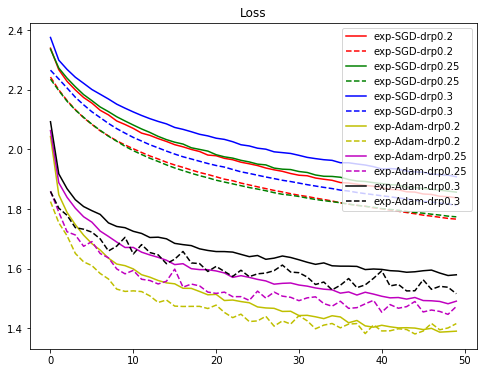

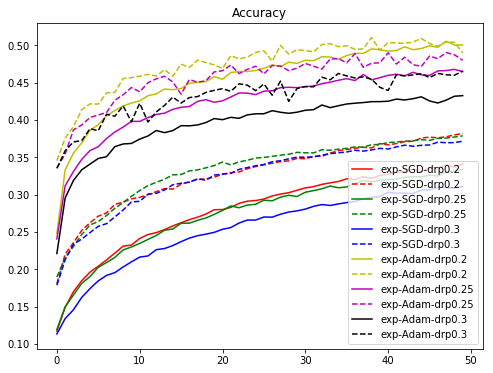

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()